In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [7]:
# system of ODEs so use solve_ivp, two different ODEs though which are the change in protein levels and mRNA levels for the 
# respective genes.
# Figure out how to bring in the GFP relationship as well


def repressilator(t, y, degredation_rate, gene_expression_rate, repression_strength, n):

    p1, r1, p2, r2, p3, r3 = y
    
    def protein_ODE(p, r, degredation_rate):
        return - degredation_rate * (p - r)

    def mRNA_ODE(r, repressor_protein, gene_expression_rate, repression_strength, n):
        return - r + (repression_strength / (1 + repressor_protein ** n)) + gene_expression_rate

    dp1dt = protein_ODE(p1, r1, degredation_rate)
    dr1dt = mRNA_ODE(r1, p3, gene_expression_rate, repression_strength, n)

    dp2dt = protein_ODE(p2, r2, degredation_rate)
    dr2dt = mRNA_ODE(r2, p1, gene_expression_rate, repression_strength, n)

    dp3dt = protein_ODE(p3, r3, degredation_rate)
    dr3dt = mRNA_ODE(r3, p2, gene_expression_rate, repression_strength, n)

    return dp1dt, dr1dt, dp2dt, dr2dt, dp3dt, dr3dt


# specify the paramters

degredation_rate = 1 ## beta
gene_expression_rate = 1 ## alpha 0
repression_strength = 50 ## alpha
n = 2 # Hill coefficient
t_span = (0, 200)
t_eval = np.linspace(0, 200, 200)
# initial concentrations
P1 = 5
P2 = 1
P3 = 0
R1 = 0
R2 = 0
R3 = 0
#numerical solving of system of ODEs using solve_ivp

solution = solve_ivp(repressilator, t_span, [P1, P2, P3, R1, R2, R3],t_eval = t_eval, args = (degredation_rate, gene_expression_rate, repression_strength, n))



t = solution.t
Protein_1 = solution.y[0]
Protein_2 = solution.y[1]
Protein_3 = solution.y[2]



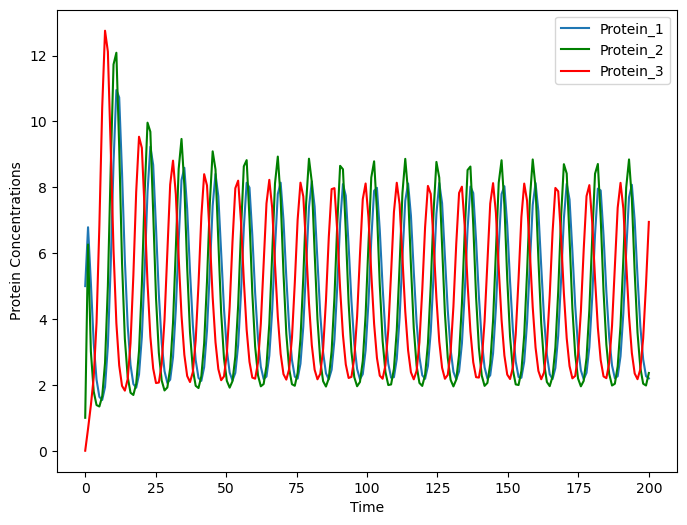

In [66]:
plt.figure(figsize = (8, 6))
plt.plot(t, Protein_1, label = "Protein_1")
plt.plot(t, Protein_2, label = "Protein_2", color = 'g')
plt.plot(t, Protein_3, label = "Protein_3", color = 'r')

plt.xlabel('Time')
plt.ylabel('Protein Concentrations')
plt.legend()
plt.show()

Epoch 0, Loss: 0.22556906429948176
Epoch 100, Loss: 0.04934787699288726
Epoch 200, Loss: 0.04879742980578248
Epoch 300, Loss: 0.0486386927737272
Epoch 400, Loss: 0.048589064270381656
Epoch 500, Loss: 0.0485712714069645
Epoch 600, Loss: 0.04856547998398732
Epoch 700, Loss: 0.04856345675694349
Epoch 800, Loss: 0.048562443260595674
Epoch 900, Loss: 0.04856171838860934
Epoch 1000, Loss: 0.04856136752795094
Epoch 1100, Loss: 0.04856104962140128
Epoch 1200, Loss: 0.04856075857482616
Epoch 1300, Loss: 0.04856046032666986
Epoch 1400, Loss: 0.048560184121242515
Epoch 1500, Loss: 0.048559896849869
Epoch 1600, Loss: 0.04855961707428378
Epoch 1700, Loss: 0.04855938619462734
Epoch 1800, Loss: 0.04855907774522062
Epoch 1900, Loss: 0.04855878393769359
Epoch 2000, Loss: 0.04855850609852983
Epoch 2100, Loss: 0.048558220371249315
Epoch 2200, Loss: 0.04855793889642043
Epoch 2300, Loss: 0.048557671530097136
Epoch 2400, Loss: 0.04855738403026262
Epoch 2500, Loss: 0.048557105807194974
Epoch 2600, Loss: 0.04

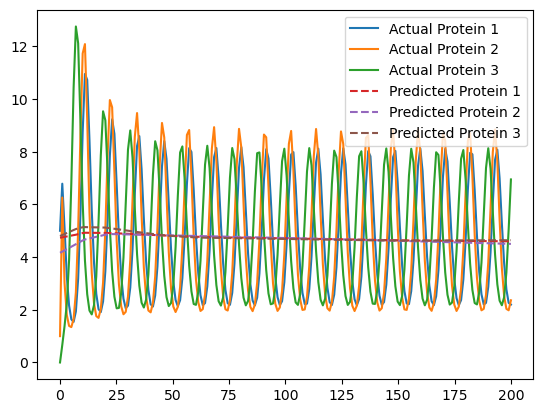